# NGC 2985 (UGC 5253)

In [56]:
from IPython.display import HTML
from IPython.display import Image
import os
import scipy.interpolate as inter

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['solve']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
name = 'NGC 2985'
gtype = '(R)SA(r)ab' #TODO: откуда
incl = 37. #adopted by Noordermeer+08, LEDA - 37.9, Epinat+08 - 36.
scale = 0.091 #kpc/arcsec

data_path = '../../data/ngc2985'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [5]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи

TODO: add

## Разное

In [7]:
# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+2985&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [8]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc2985 width=1000 height=350></iframe>')

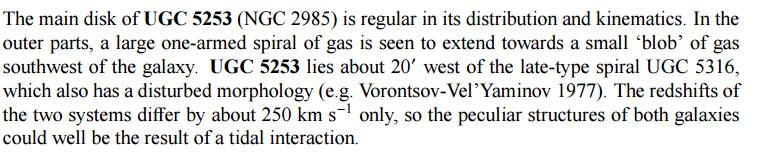

In [10]:
os.chdir(data_path)
Image('noordermeer_data/n2985_cite_p39.png')

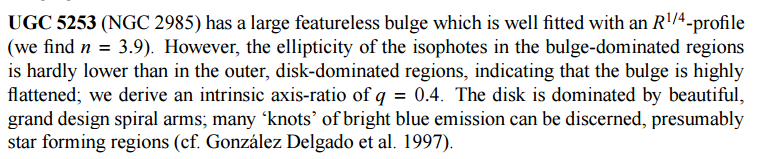

In [11]:
Image('noordermeer_data/n2985_cite_p110.png')

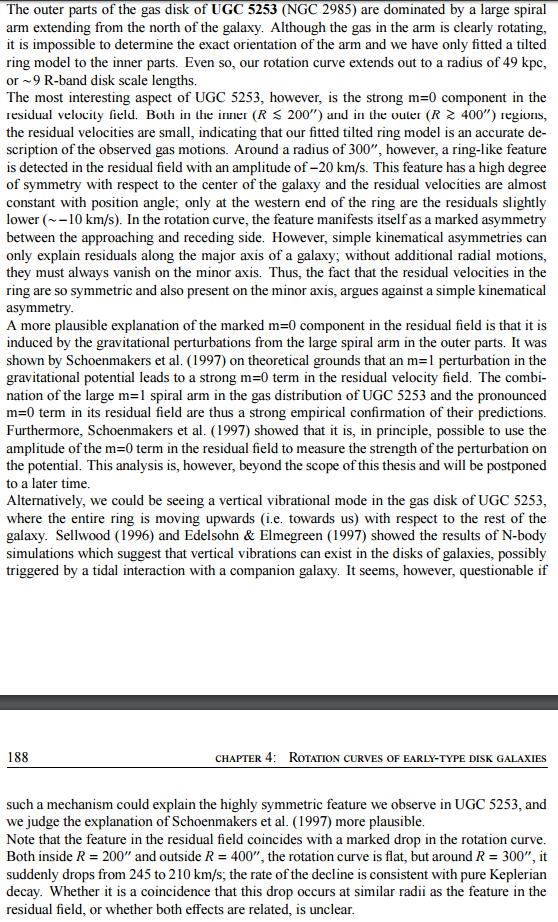

In [12]:
Image('noordermeer_data/n2985_cite_pp187_188.png')

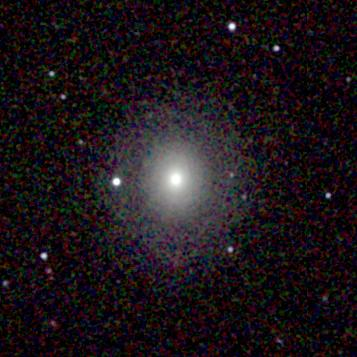

In [13]:
#2MASS
Image('ngc2985_JHK.jpg', width=300)

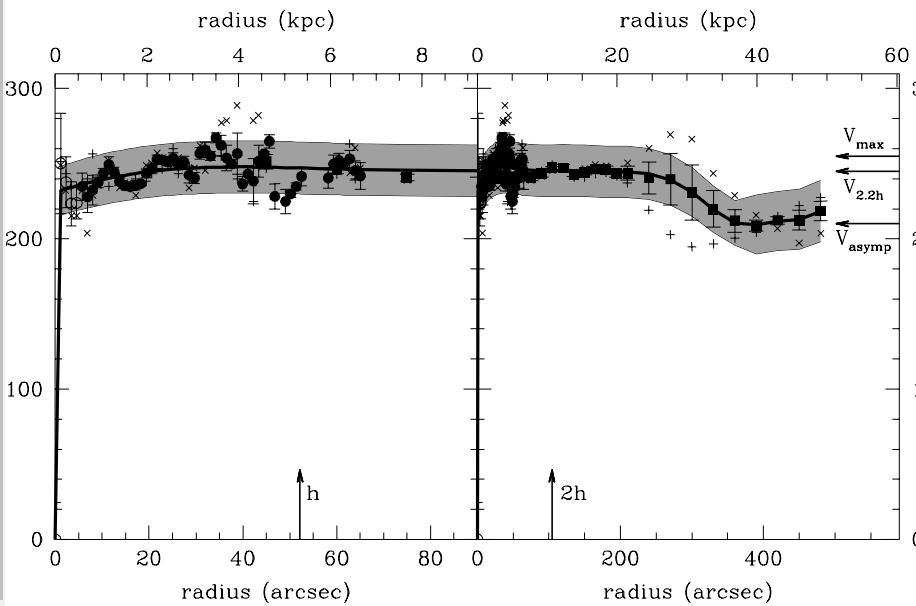

In [14]:
Image('noordermeer_data/n2985_rc.png')

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


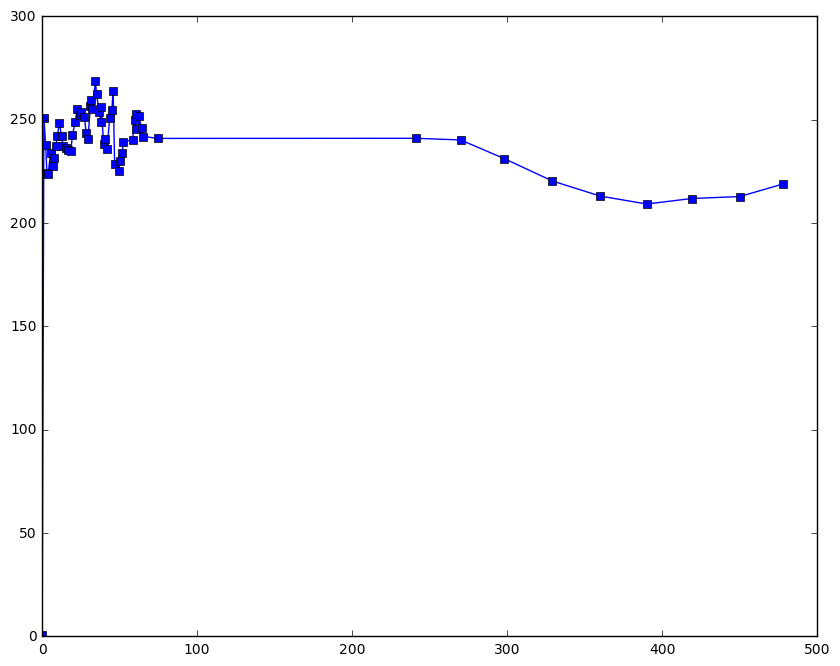

In [24]:
# Данные по звездной кинематике Noordermeer вдоль большей полуоси (не исправленные за наклон?)
r, vel = zip(*np.loadtxt("noordermeer_data/n2985_rc_noorderm.dat", float, delimiter=','))

fig = plt.figure(figsize=[10,8])
plt.plot(r, vel, 's-')
plt.legend()
plt.show()

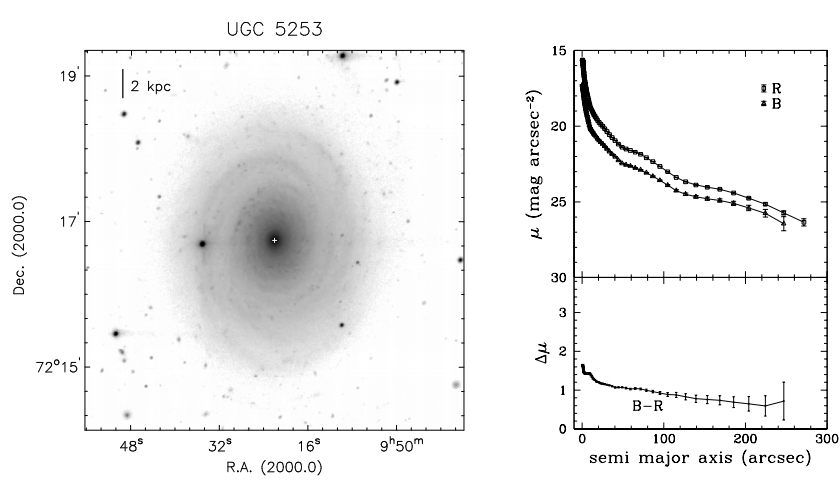

In [15]:
Image('noordermeer_data/n2985_photom.png')

## Кинематические данные по звездам

* HSM99 - дисперсии и скорости до ~35"
* Ноордермеер 2008 - дисперсии и скорости до 100"

TODO: add links and check exact values

### Кривая вращения

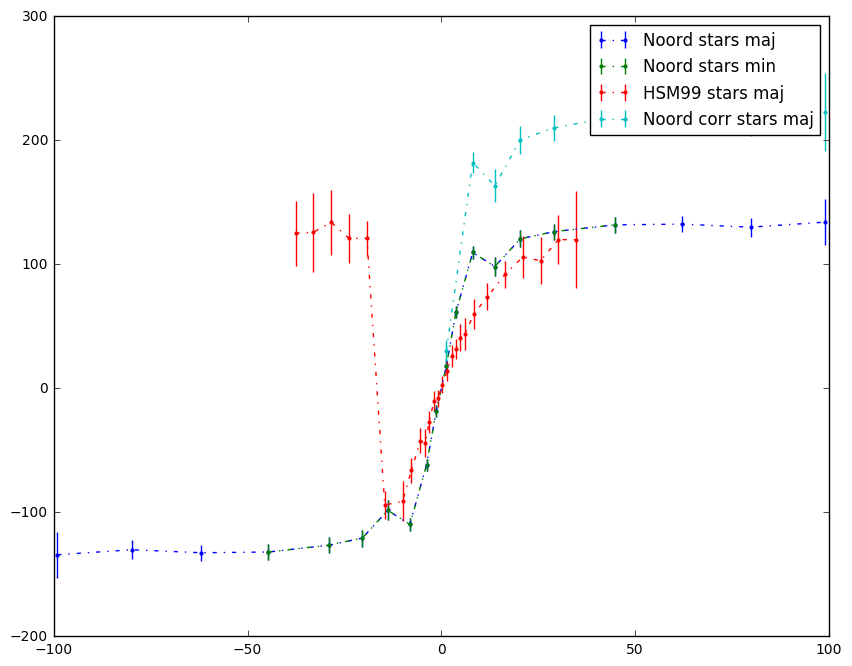

In [43]:
# Данные по звездной кинематике Noordermeer вдоль большей полуоси (не исправленные за наклон?)
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("v_stars_ma.dat", float))

# Данные по звездной кинематике HSM99 вдоль большой полуоси (не исправленные за наклон)
r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, sig_ma_hsm, e_sig_ma_hsm = zip(*np.loadtxt("v_stars_her.dat", float))

# Данные по звездной кинематике Noord вдоль большой полуоси (исправленные за наклон)
r_ma_n, vel_ma_n, e_vel_ma_n, sig_ma_n, e_sig_ma_n = zip(*np.loadtxt("v_stars_noord_1.dat", float))

# Данные по звездной кинематике Noordermeer вдоль малой полуоси (исправленные за наклон?)
r_mi, vel_mi, e_vel_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("v_stars_mi.dat", float))

fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Noord stars maj")
plt.errorbar(r_mi, vel_mi, e_vel_mi, fmt='-.', marker='.', mew=0, label="Noord stars min")
plt.errorbar(r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, fmt='-.', marker='.', mew=0, label="HSM99 stars maj")
plt.errorbar(r_ma_n, vel_ma_n, e_vel_ma_n, fmt='-.', marker='.', mew=0, label="Noord corr stars maj")
plt.legend()
plt.show()

Малая ось точно не валидна, другие данные похожи. Перегнем:

In [45]:
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*sorted(zip(np.abs(r_ma), np.abs(vel_ma), e_vel_ma, sig_ma, e_sig_ma)))
r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, sig_ma_hsm, e_sig_ma_hsm = zip(*sorted(zip(np.abs(r_ma_hsm), np.abs(vel_ma_hsm), e_vel_ma_hsm, sig_ma_hsm, e_sig_ma_hsm)))

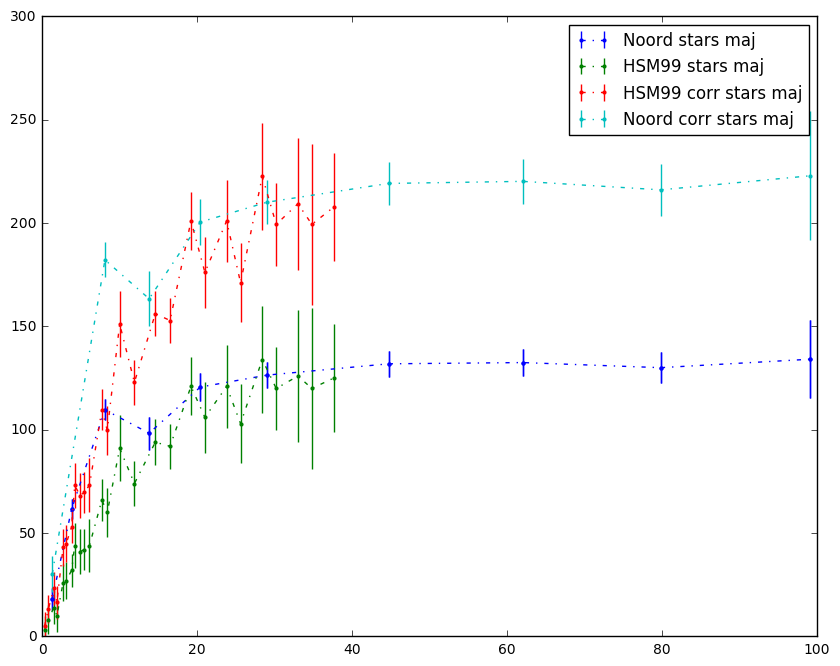

In [46]:
fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Noord stars maj")
plt.errorbar(r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, fmt='-.', marker='.', mew=0, label="HSM99 stars maj")
plt.errorbar(r_ma_hsm, map(lambda l: l/sin_i, vel_ma_hsm), e_vel_ma_hsm, fmt='-.', marker='.', mew=0, label="HSM99 corr stars maj")
plt.errorbar(r_ma_n, vel_ma_n, e_vel_ma_n, fmt='-.', marker='.', mew=0, label="Noord corr stars maj")
plt.legend()
plt.ylim(0, 300)
plt.show()

TODO: add approximations

### Дисперсии

Для большой оси: $\sigma^2_{maj} = \sigma^2_{\varphi}\sin^2 i + \sigma^2_{z}\cos^2 i$, следовательно примерные ограничения
$$\sigma_{maj} < \sigma_R = \frac{\sigma_{maj}}{\sqrt{f\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sqrt{2}\sigma_{maj}}{\sin i} (или \frac{\sigma_{maj}}{\sqrt{f}\sin i}),$$ 
или можно более точную оценку дать, если построить $f$ (сейчас $0.5 < f < 1$).

Для малой оси: $\sigma^2_{min} = \sigma^2_{R}\sin^2 i + \sigma^2_{z}\cos^2 i$ и ограничения
$$\sigma_{min} < \sigma_R = \frac{\sigma_{min}}{\sqrt{\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{min}}{\sin i}$$ 

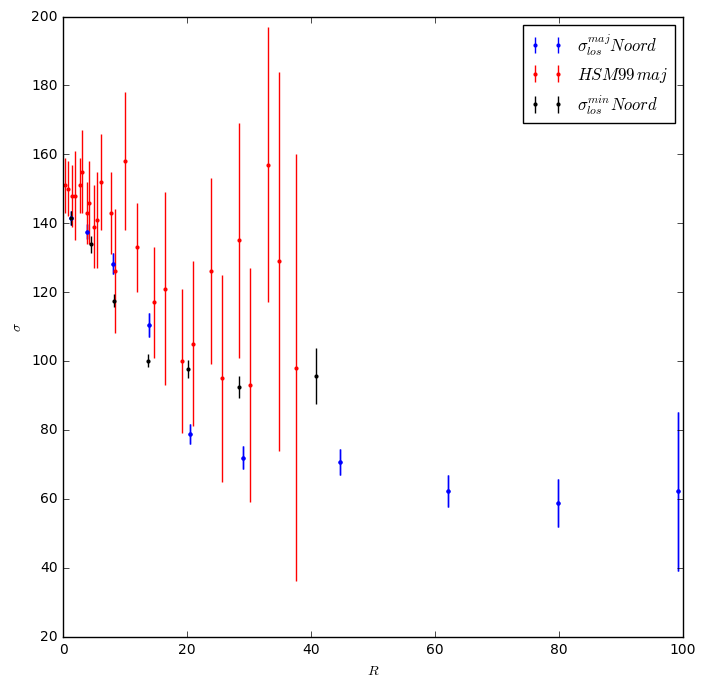

In [54]:
# # Исправляем значения вдоль малой оси на синус угла:    
# def correct_min(R):    
#     return R / cos_i

# r_sig_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("s_stars_maN.dat", float))
r_sig_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("s_stars_miN.dat", float))

fig = plt.figure(figsize=[8, 8])
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$\sigma_{los}^{maj} Noord$')
plt.errorbar(map(abs, r_ma_hsm), sig_ma_hsm, yerr=e_sig_ma_hsm, fmt='.', marker='.', mew=0, color='red', label=r'$HSM99\, maj$')
# TODO: надо исправлять или нет?
# r_mi_extend = map(correct_min, r_sig_mi)
# plt.errorbar(r_mi_extend, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black', label='$\sigma_{los}^{min} Noord$')
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black', label='$\sigma_{los}^{min} Noord$')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend()
plt.show()

Видно, что в пределах первых 20 секунд HSM хорошо следует Ноордермееру (дальше тоже, но ошибки больше). Не ясно,надо ли исправлять малоу полуось. Также стоит заметить, что файлы ```s_stars_*``` отличаются от сосчитанных значений дисперсий (радиусы например).

TODO: проверить дисперсии<br>
TODO: поискать еще данных

Т.к. насчет малой оси я не уверен - приближения делаем по большой.

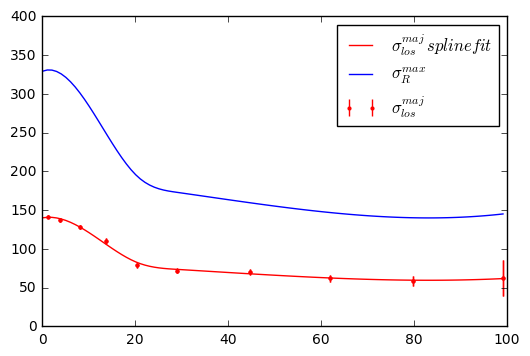

In [148]:
spl_maj = inter.UnivariateSpline(r_ma, sig_ma, k=3, s=100.)
sig_R_max = lambda l: spl_maj(l)*sqrt(2)/sin_i

points = np.linspace(0.1, max(r_ma), 100)

plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, spl_maj(points), label = '$\sigma_{los}^{maj}\, splinefit$', color='red')
plt.plot(points, map(sig_R_max, points), label = '$\sigma_R^{max}$', color='blue')
plt.legend()
plt.ylim(0,400)
plt.xlim(0,100)
plt.show()

TODO: зафиксировать после последней точки

## Данные по газу

In [63]:
# TODO: поискать еще данные и добавить статьи

### Кривая вращения

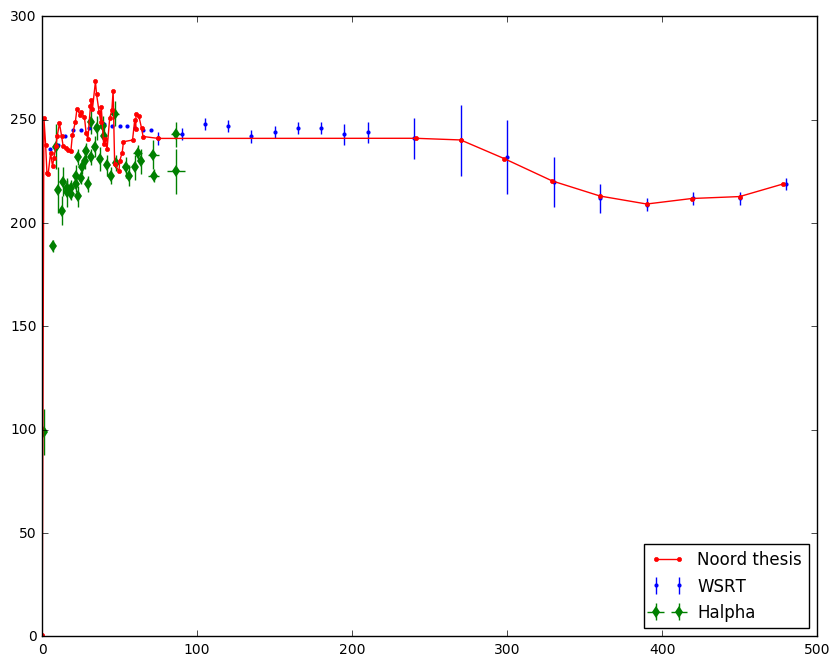

In [60]:
fig = plt.figure(figsize=[10,8])

# TODO: проверить как сняты данные
# Noordermeer+2007 ionized gas + HI
r_wsrt, vel_wsrt, e_vel_wsrt = zip(*np.loadtxt("v_gas_WSRT.dat", float))

# Данные по кинематике газа Epinat+2008 в Halpha
r_ha, dr_ha,_,_, vel_ha, e_vel_ha, _,_ = zip(*np.loadtxt("v_gasHa.dat", str))
r_ha, dr_ha, vel_ha, e_vel_ha = np.array(r_ha, dtype='float'), np.array(dr_ha, dtype='float'), np.array(vel_ha, dtype='float'), np.array(e_vel_ha, dtype='float')

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_ha, vel_ha, yerr=e_vel_ha, xerr=dr_ha, fmt='.', marker='d', mew=0, label = 'Halpha')
plt.plot(r, vel, '.-', label = 'Noord thesis')
plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

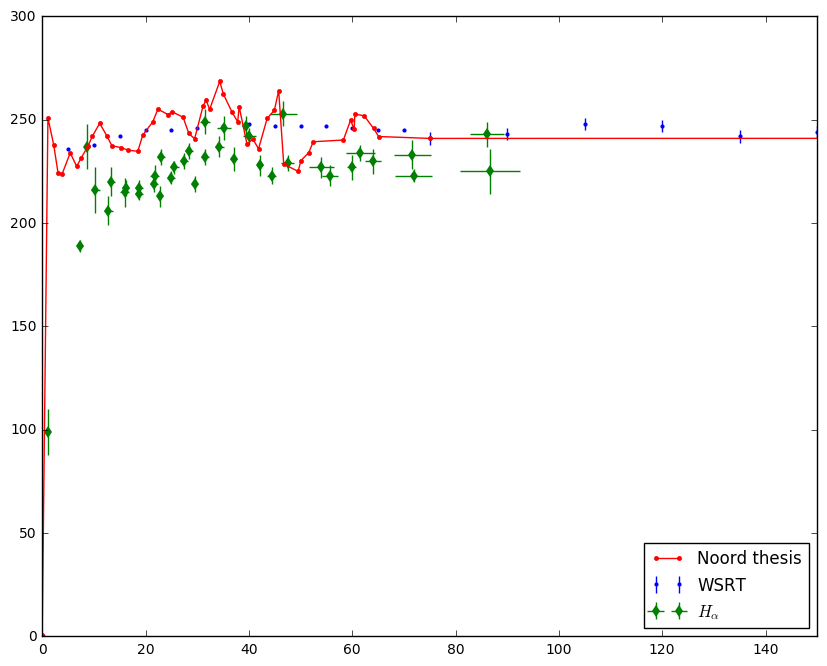

In [64]:
fig = plt.figure(figsize=[10,8])
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_ha, vel_ha, yerr=e_vel_ha, xerr=dr_ha, fmt='.', marker='d', mew=0, label = r'$H_{\alpha}$')
plt.plot(r, vel, '.-', label = 'Noord thesis')
plt.ylim(0, 300)
plt.xlim(0, 150.)
plt.legend(loc='lower right')
plt.show()

Видно, что я неплохо снял данные из диссертации и что в целом все данные следуют друг другу. Опять, как и в 3898 $H_{\alpha}$ ниже HI.

Приблизим:

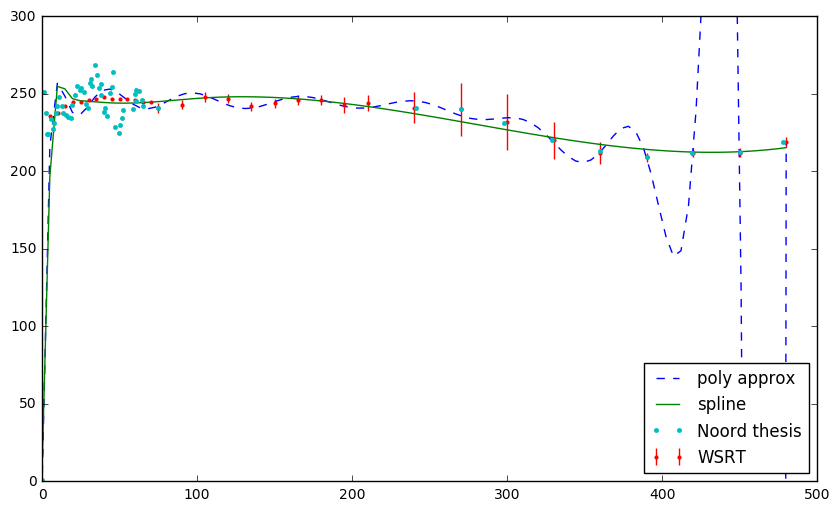

In [76]:
fig = plt.figure(figsize=[10,6])

gas_approx = poly1d(polyfit(r_wsrt, vel_wsrt, deg=17))
test_points = np.linspace(min(r_wsrt), max(r_wsrt), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(r_wsrt, vel_wsrt, k=3, s=2400.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.plot(r, vel, '.', label = 'Noord thesis')
plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

Непонятно конечно, что делать с таким обилием точек как раз в нужной области - по ним выходит, что все не так уж гладко там.

TODO: разобраться

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

TODO: использовать $\varkappa$? точно ли тут газовая кривая?

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


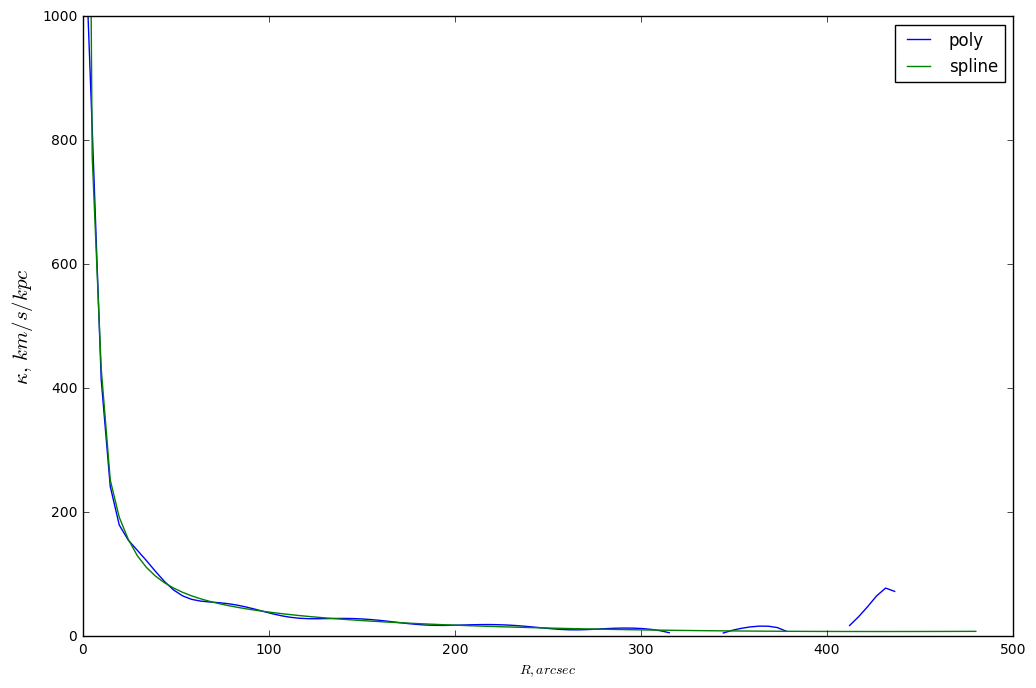

In [78]:
# TODO: move to utils
def epicyclicFreq_real(poly_gas, R, resolution):
    '''Честное вычисление эпициклической частоты на расстоянии R для сплайна или полинома'''
    try:
        return sqrt(2.0) * poly_gas(R) * sqrt(1 + R * poly_gas.deriv()(R) / poly_gas(R)) / (R * resolution )
    except:
        return sqrt(2.0) * poly_gas(R) * sqrt(1 + R * poly_gas.derivative()(R) / poly_gas(R)) / (R * resolution )
    
fig = plt.figure(figsize=[12, 8])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')
plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 1000)
plt.legend()
plt.show()

### Поверхностная плотность газа 

Плотность HI:

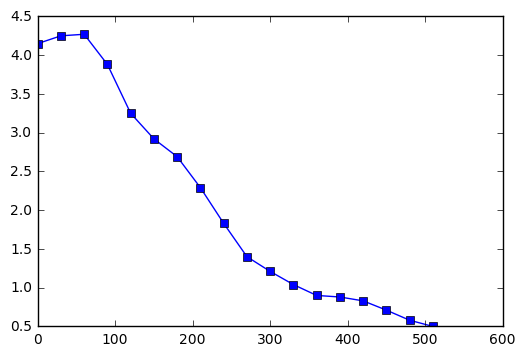

In [79]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_density.dat", float))

plt.plot(r_g_dens, gas_dens, 's-')
plt.show()

TODO: поискать еще данных, в том числе по молекулярке

## Данные по фотометрии

Диплом: B, R - маленькие, около 60, макс. диск ~ 450 (M/L=6), другие R и J - больше 1000, похоже два диска

* Méndez-Abreu https://ui.adsabs.harvard.edu/#abs/2008A&A...478..353M/abstract в J
* Gutierrez https://ui.adsabs.harvard.edu/#abs/2011AJ....142..145G/abstract в R
* https://arxiv.org/pdf/1510.05752v1.pdf - декомпозиция из кривой вращения, соотв. прямая массовая модель
* в http://adsabs.harvard.edu/cgi-bin/bib_query?1998AJ....116.1626B и https://arxiv.org/pdf/1104.1053v1.pdf без диска(
* http://www.aanda.org/articles/aa/pdf/2001/10/aa10227.pdf - J, H, K
* вроде есть в S4G

TODO: поискать в S4G

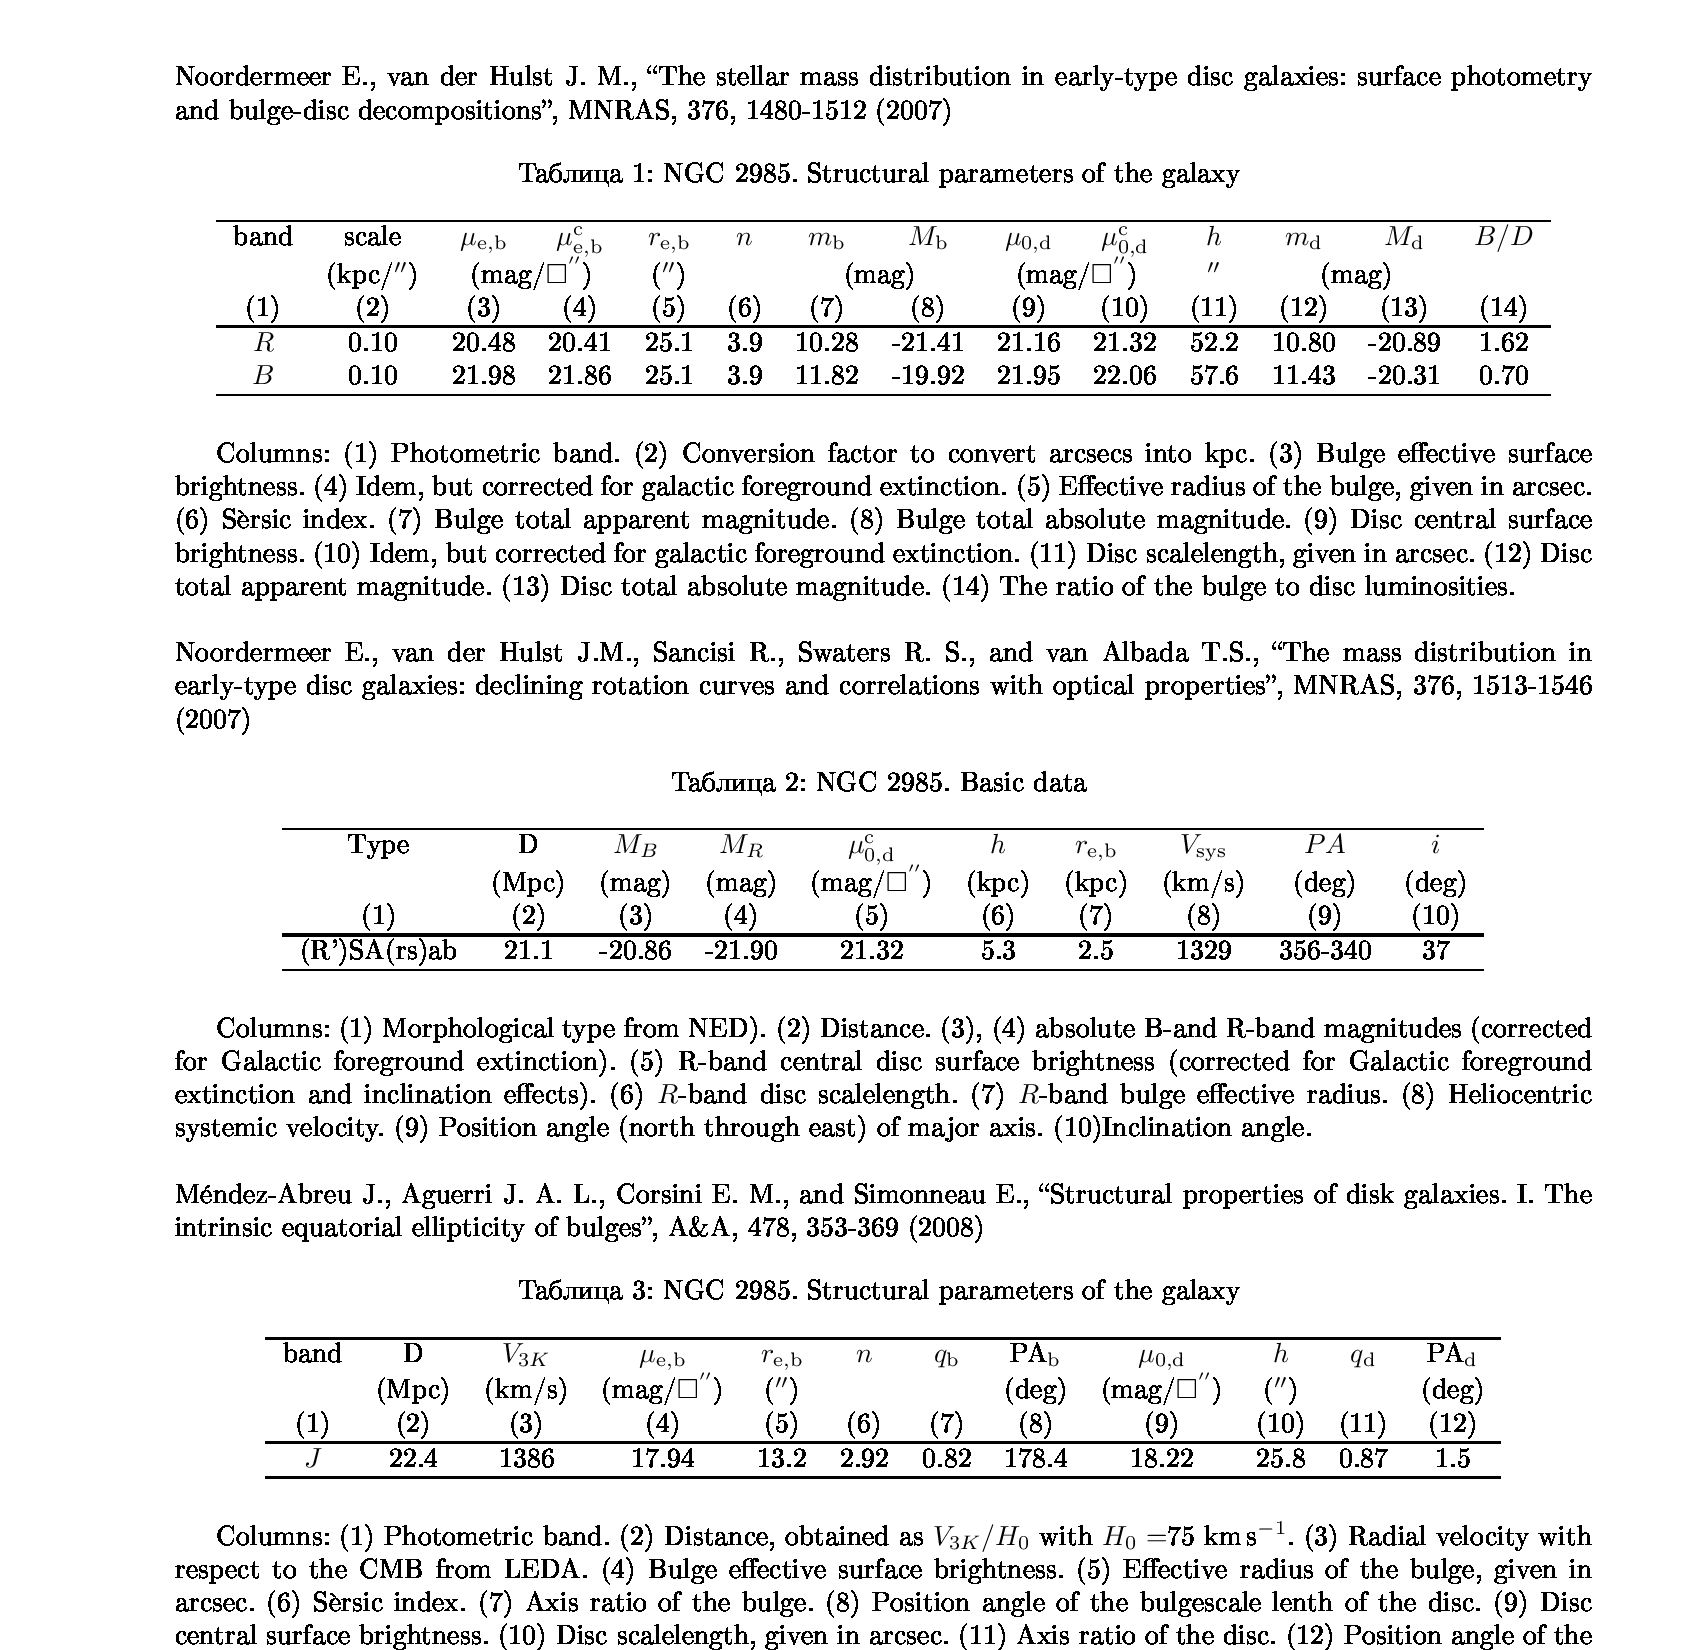

In [88]:
from wand.image import Image as WImage
img = WImage(filename='ngc2985.pdf', resolution=200)
img[:, 150:1800]

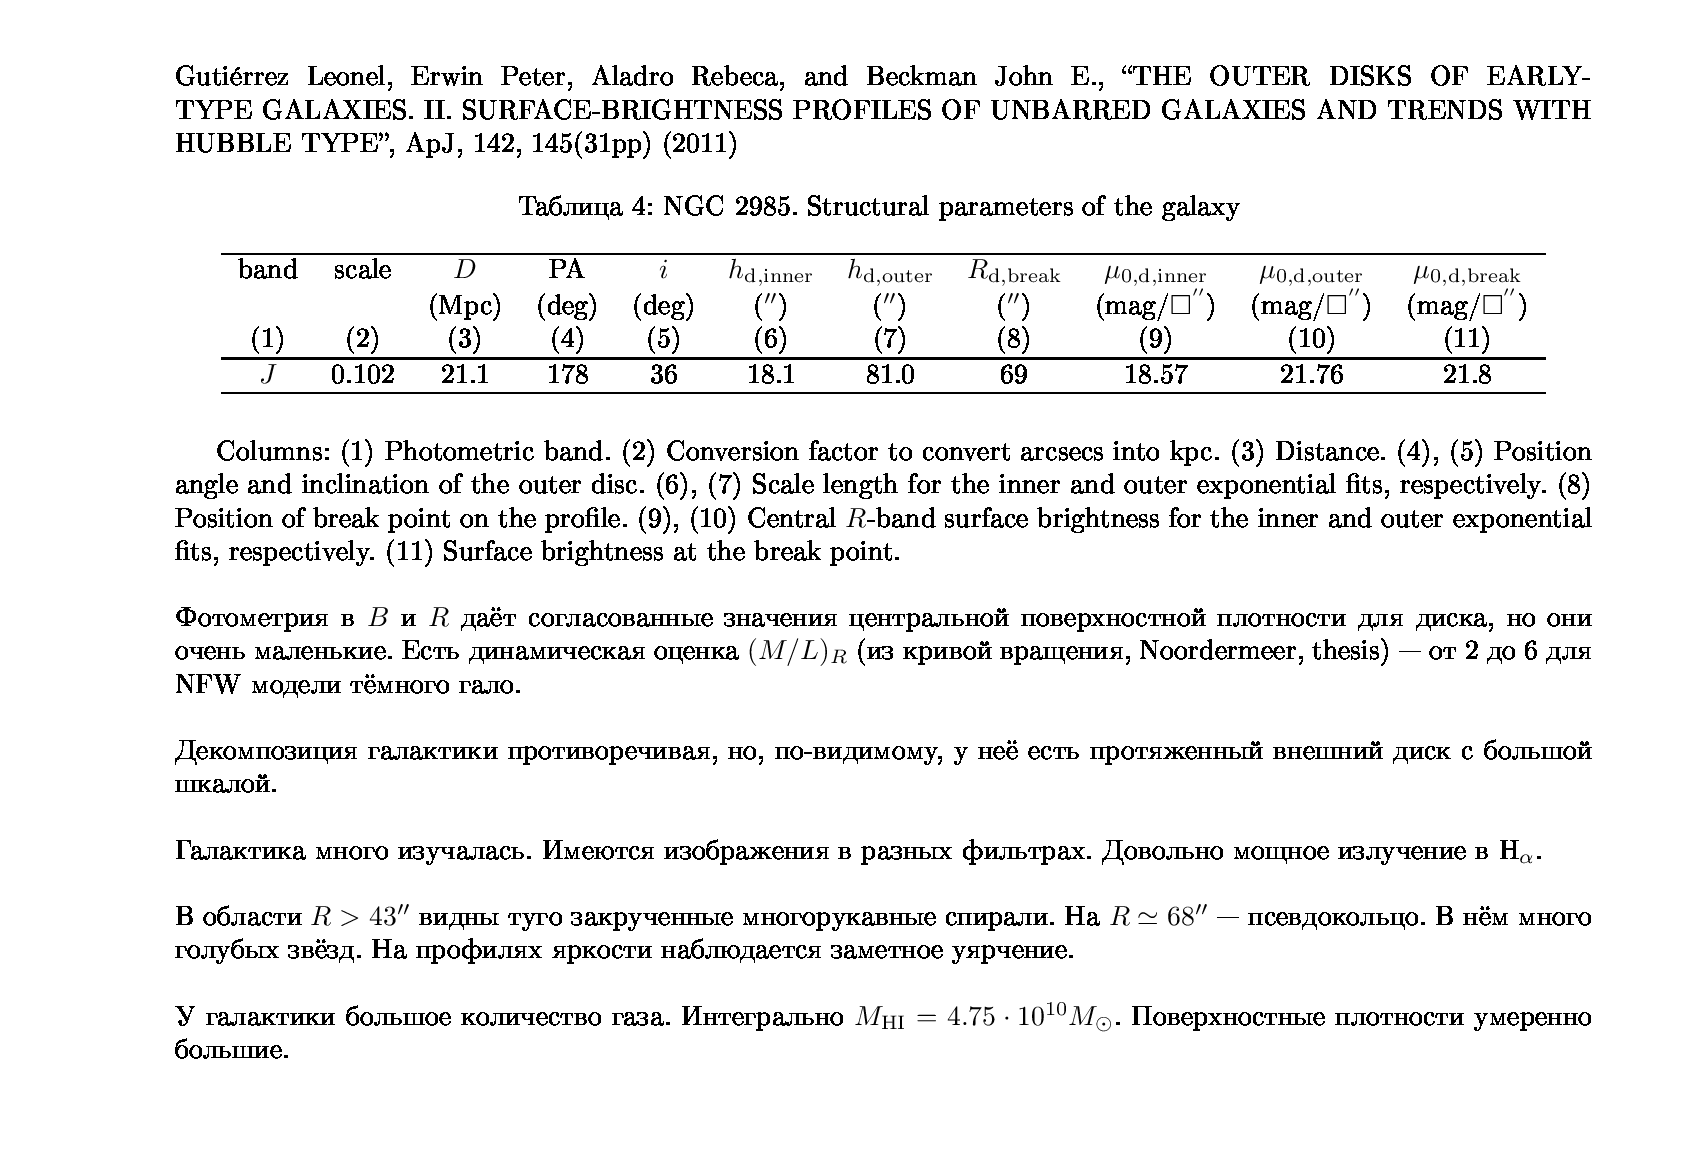

In [89]:
img = WImage(filename='ngc2985.pdf[1]', resolution=200)
img[:, 150:1300]

Фотометрия Ноордермеера:

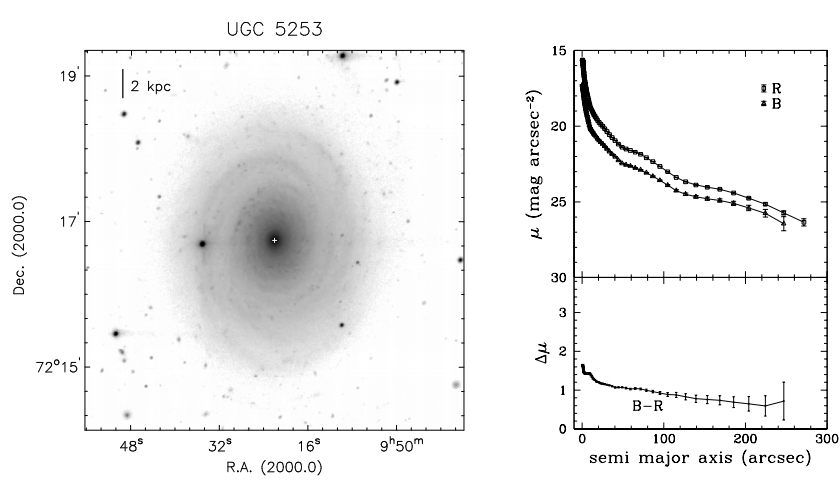

In [90]:
Image('noordermeer_data/n2985_photom.png')

Снятые R-данные:

(30, 15)

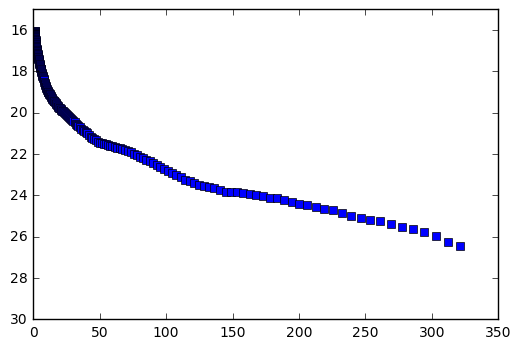

In [91]:
r_phot2, r_band = zip(*np.loadtxt('Rband_ngc2985.dat', float))

plt.plot(r_phot2, r_band, 's')
plt.ylim(30, 15)

Снятые вместе данные:

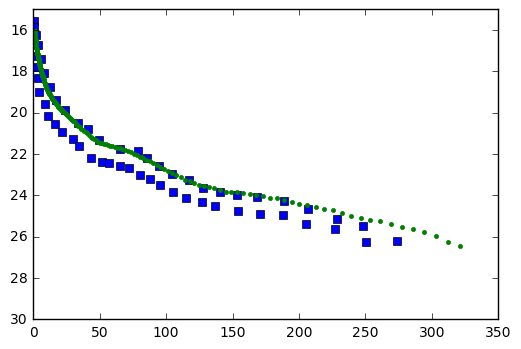

In [92]:
r_phot, mu_phot = zip(*np.loadtxt('noordermeer_data/n2985_noord_photoRB.dat', float, delimiter=','))

plt.plot(r_phot, mu_phot, 's')
plt.plot(r_phot2, r_band, '.')
plt.ylim(30, 15)
plt.show()

Согласуются.

In [93]:
M_R = -20.89 #10.80 - это правильно? надо брать абсолютные? в дипломе были относительные, тут разница уже существенная
M_B = -20.31 #11.43

$$\log_{10}(M/L)=a_{\lambda} + b_{\lambda}\times Color$$

In [95]:
print 'Abs B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(M_B-M_R, 'B', 'B-R'), bell_mass_to_light(M_B-M_R, 'R', 'B-R'))
print 'Rel B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(11.43-10.80, 'B', 'B-R'), bell_mass_to_light(11.43-10.80, 'R', 'B-R'))

Abs B : 0.47; R: 0.75.
Rel B : 0.53; R: 0.81.


Тут разница не очень большая, что именно брать - и то и то маленькое.

In [96]:
# R-band
r_eff_R = 25.1
mu_eff_R = 20.48 # уточнить это ли число
n_R = 3.9
mu0d_R = 21.16 # и тут тоже
h_disc_R = 52.2

mu_eff_Rc = 20.41 # уточнить это ли число
mu0d_Rc = 21.32 # и тут тоже

In [97]:
# B-band
r_eff_B = 25.1
mu_eff_B = 21.98 # уточнить это ли число
n_B = 3.9
mu0d_B = 21.95 # и тут тоже
h_disc_B = 57.6

mu_eff_Bc = 21.86 # уточнить это ли число
mu0d_Bc = 22.06 # и тут тоже

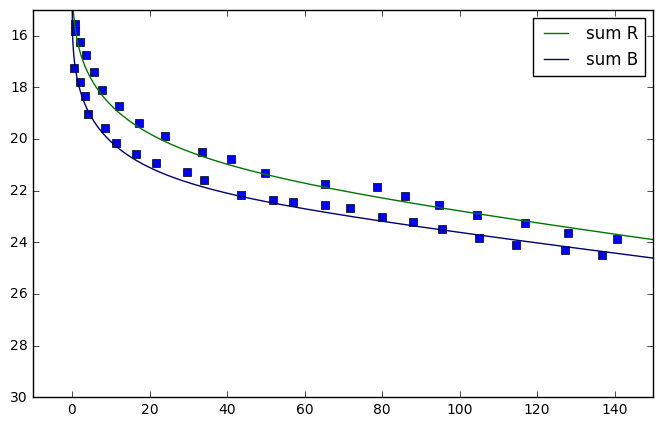

In [98]:
p_ = np.arange(0., 300., 0.1)

fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_R, r_eff=r_eff_R, n=n_R) for l in p_], 
                              [mu_disc(l, mu0=mu0d_R, h=h_disc_R) for l in p_]), '-', label='sum R', color='#007700')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_B, r_eff=r_eff_B, n=n_B) for l in p_], 
                              [mu_disc(l, mu0=mu0d_B, h=h_disc_B) for l in p_]), '-', label='sum B', color='#000077')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.legend()
plt.show()

Отлично, похоже на правду. Массовые модели:

0.58 0.63


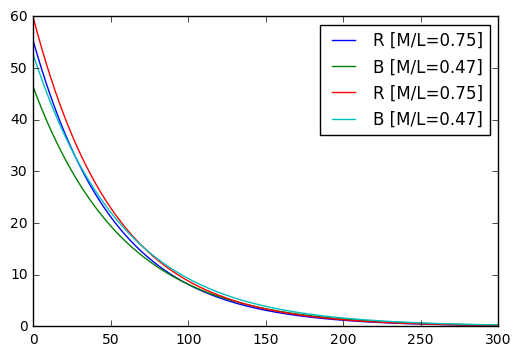

In [136]:
b_r_color = M_B-M_R

M_to_L_R = bell_mass_to_light(b_r_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_B = bell_mass_to_light(b_r_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

diploma_color = 11.43-10.80

M_to_L_Rc = bell_mass_to_light(diploma_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_Rc, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_Bc = bell_mass_to_light(diploma_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_Bc, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

print b_r_color, diploma_color

plt.legend()
plt.show()

Тут все как в дипломе, очень маленькие значения получились. Разница в цвете никакая, можно не учитывать.

Méndez-Abreu фотометрия в $J$:

In [100]:
# J-band
r_eff_J = 13.2
mu_eff_J = 17.94
n_J = 2.92
mu0d_J = 18.22
h_disc_J = 25.8

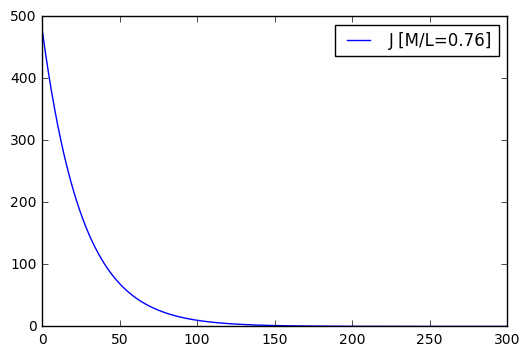

In [103]:
M_to_L_J = bell_mass_to_light(b_r_color, 'J', 'B-R')
surf_J = [surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))
plt.legend()
plt.show()

Получилось не то, что в дипломе - надо понять, почему.

TODO: понять почему отличается (M/L в дипломе другое)

Gutierrez в $R$ (в пдф-ке неверно записано J), модель достаточно странная - ибо нет балджа.

In [108]:
h_in=18.1
h_out=81.0
h_brk=69.
mu_in=18.57
mu_out=21.76
mu_brk=21.8

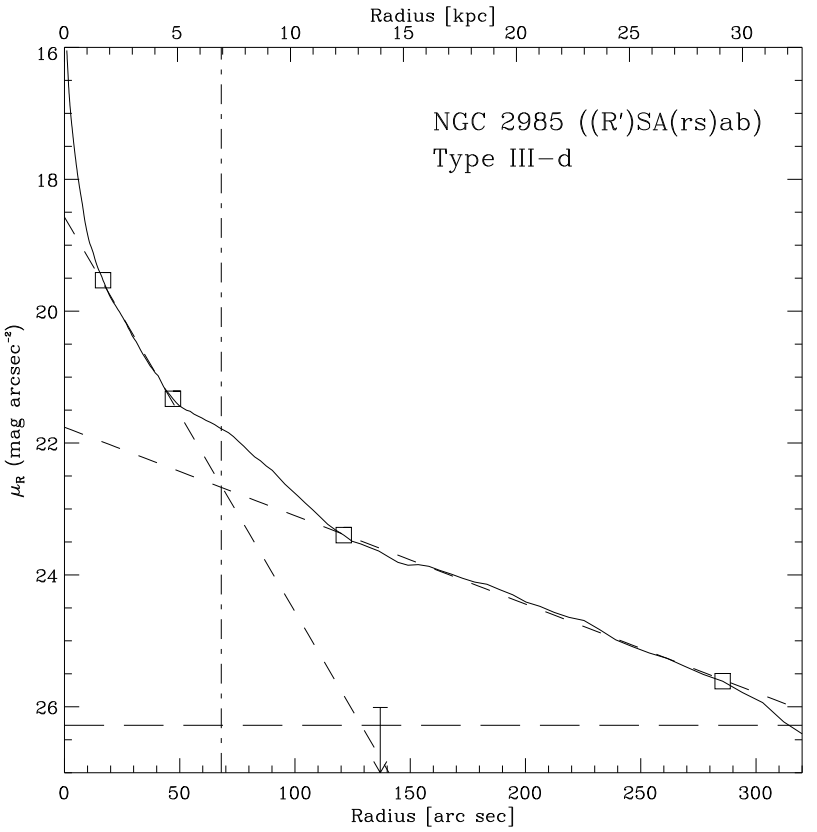

In [107]:
Image('gutierrez_Rphotom.png', width=500)

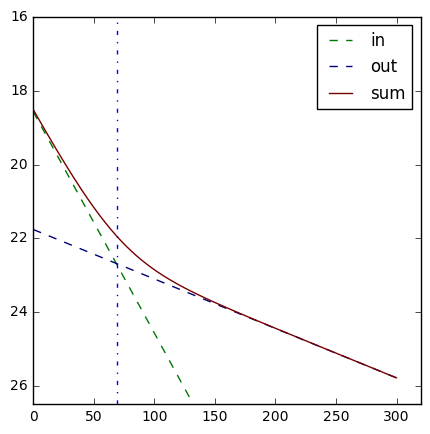

In [121]:
fig = plt.figure(figsize=[5, 5])
plt.plot(p_, [mu_disc(l, mu0=mu_in, h=h_in) for l in p_], '--', label='in', color='#007700')
plt.plot(p_, [mu_disc(l, mu0=mu_out, h=h_out) for l in p_], '--', label='out', color='#000077')
plt.plot(p_, total_mu_profile([mu_disc(l, mu0=mu_in, h=h_in) for l in p_], 
                              [mu_disc(l, mu0=mu_out, h=h_out) for l in p_]), '-', label='sum', color='#770000')
plt.xlim(0., 320)
plt.ylim(26.5, 16)
plt.legend()
plt.axvline(x = h_brk, linestyle='-.')
plt.show()

Похоже. Возьмем внутренний диск:

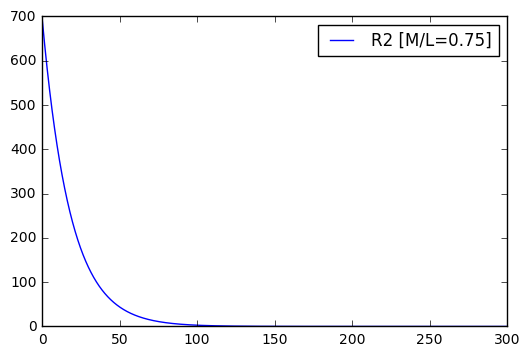

In [122]:
surf_R2 = [surf_density(mu=mu_disc(l, mu0=mu_in, h=h_in), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R2, '-', label='R2 [M/L={:2.2f}]'.format(M_to_L_R))
plt.legend()
plt.show()

Опять отличается, не ясно почему (M/L на этот раз похоже).

TODO: понять почему

Декомпозиция в Sofue 2016 из кривой вращения:

In [127]:
M_bulge = 0.39 #± 0.07
a_b = 0.56 #± 0.14 kpc
M_disk = 1.1 #± 0.1
a_d = 1.1 #± 0.2 kpc

Для диска верно: $M_d = 2\pi a_d^2 \Sigma_0$

In [130]:
M_disk * 10.**10 / (2*np.pi) / (a_d * 1000.)**2

1446.8631190172305

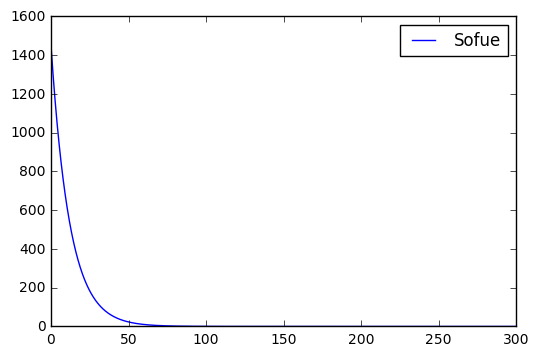

In [132]:
Sigma_0_sofue = M_disk * 10.**10 / (2*np.pi) / (a_d * 1000.)**2
surf_sofue = [Sigma_0_sofue*np.exp(-l*scale/a_d) for l in p_]
plt.plot(p_, surf_sofue, '-', label='Sofue')
plt.legend()
plt.show()

Наконец, JHK из работы http://www.aanda.org/articles/aa/pdf/2001/10/aa10227.pdf:

In [133]:
mudJ, mudH, mudK = 18.05, 17.27, 17.32 
hJ, hH, hK = 30.63, 26.10, 31.08
mueJ, mueH, mueK = 17.73, 17.03, 17.23 
reJ, reH, reK = 12.08, 12.81, 14.06
nJ, nH, nK = 1./0.35, 1./0.35, 1./0.33

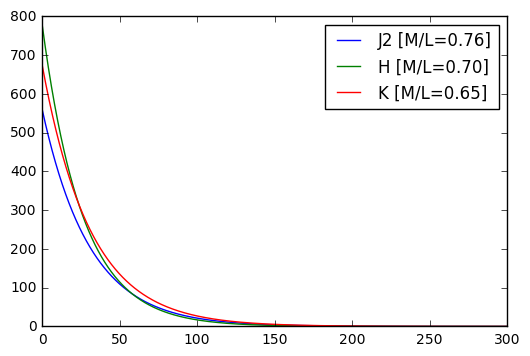

In [137]:
M_to_L_J = bell_mass_to_light(b_r_color, 'J', 'B-R')
surf_J2 = [surf_density(mu=mu_disc(l, mu0=mudJ, h=hJ), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J2, '-', label='J2 [M/L={:2.2f}]'.format(M_to_L_J))

M_to_L_H = bell_mass_to_light(b_r_color, 'H', 'B-R')
surf_H = [surf_density(mu=mu_disc(l, mu0=mudH, h=hH), M_to_L=M_to_L_H, band='H') for l in p_]
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))

M_to_L_K = bell_mass_to_light(b_r_color, 'K', 'B-R')
surf_K = [surf_density(mu=mu_disc(l, mu0=mudK, h=hK), M_to_L=M_to_L_K, band='K') for l in p_]
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))


plt.legend()
plt.show()

На удивление согласуется друг с другом. 

Финальная сводная картинка:

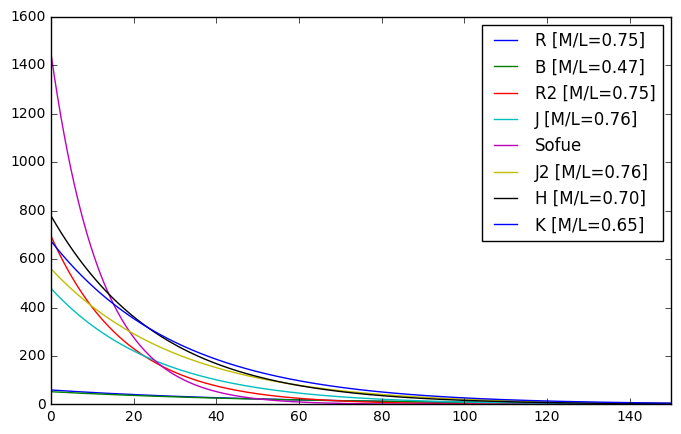

In [140]:
fig = plt.figure(figsize=[8, 5])
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))
plt.plot(p_, surf_R2, '-', label='R2 [M/L={:2.2f}]'.format(M_to_L_R))
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))
plt.plot(p_, surf_sofue, '-', label='Sofue')
plt.plot(p_, surf_J2, '-', label='J2 [M/L={:2.2f}]'.format(M_to_L_J))
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))

plt.legend()
plt.xlim(0, 150.)
plt.show()

Видно, что фотометрия Ноордрмеера совсем какая-то левая, пять остальных примерно согласуются со значениями в 500-800 и есть одна очень большая.

На самом деле во всем этом еще важна скорость падения!

## Зоны звездообразования


Hameed & Devereux 2005, $H_{\alpha}$:

TODO: поискать еще данных и измерить корректно размер

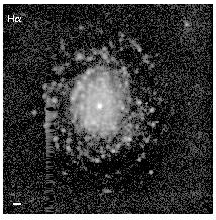

In [141]:
Image('ngc2985_Halpha.jpg')

(0, 200)

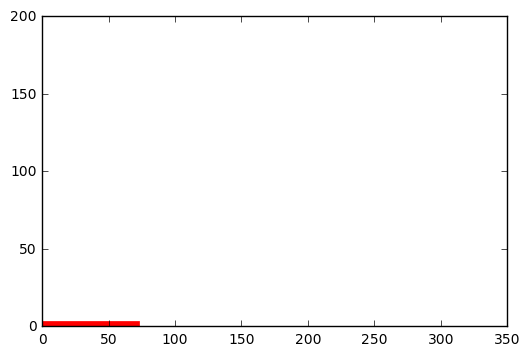

In [143]:
def plot_SF(ax):
    ax.plot([0., 70.], [0., 0.], '-', lw=7., color='red')
    
plot_SF(plt.gca())
plt.xlim(0, 350)
plt.ylim(0, 200)

## Неустойчивость

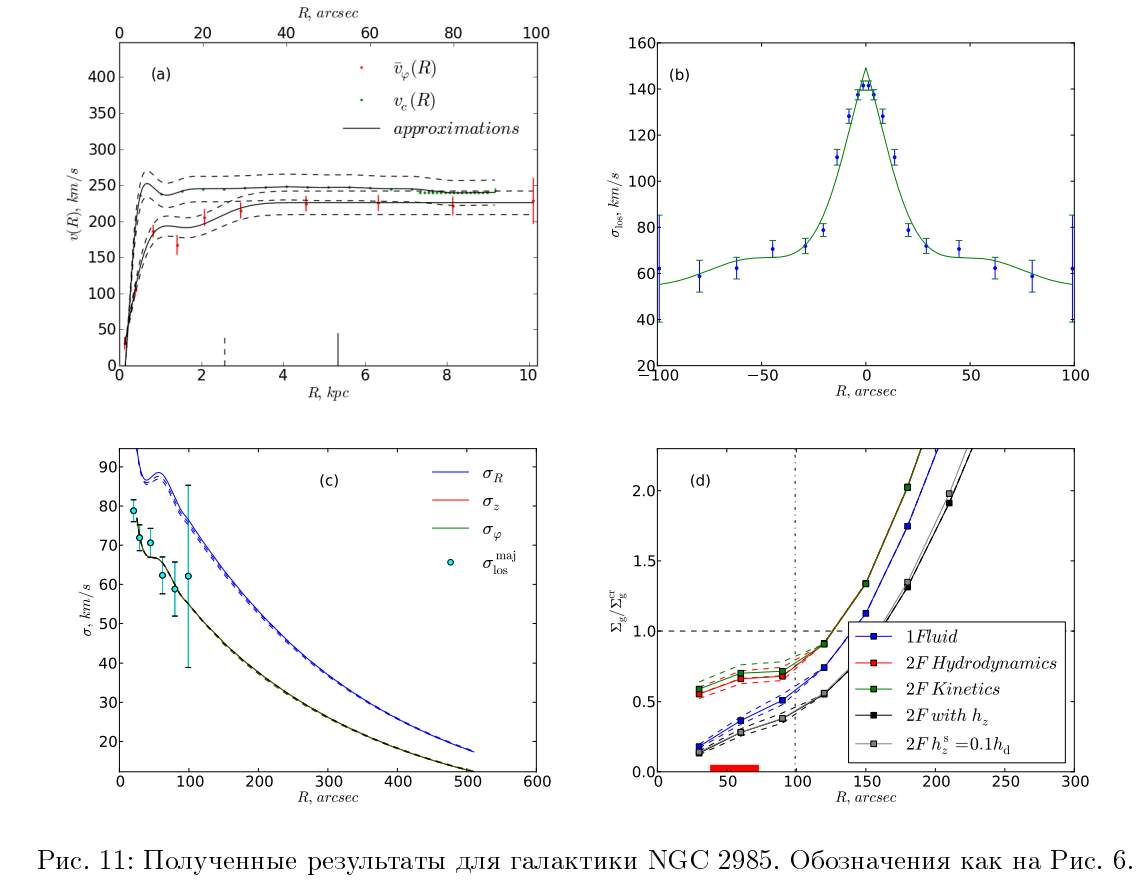

In [16]:
Image('diplom_results.png')

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [144]:
sound_vel = 6  #скорость звука в газе, км/с

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


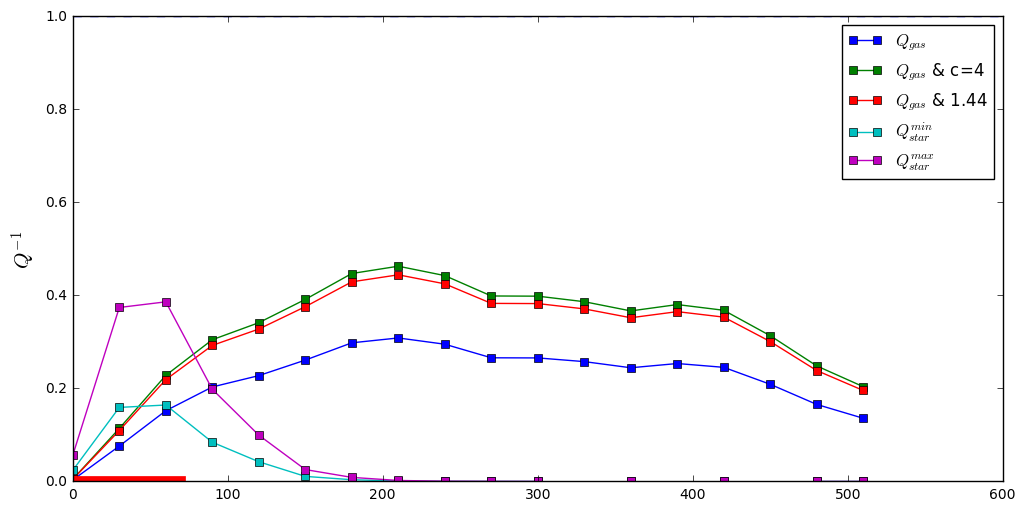

In [151]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=1.44*l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & 1.44')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        sig_R_max(r_g_dens), 
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mudK, h=hK) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        spl_maj(r_g_dens), 
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mudK, h=hK) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.show()

Значения одножидкостного похожи на диплом (без 1.6).

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

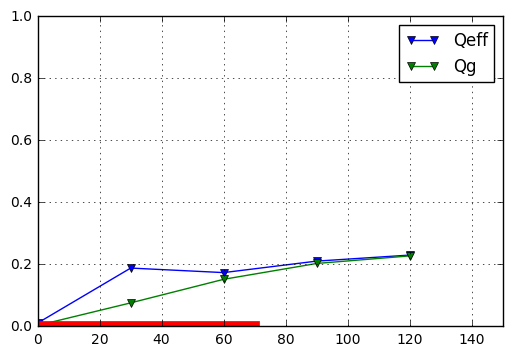

In [154]:
gas_data = zip(r_g_dens, gas_dens)[:5] #в нуле не берем
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_max,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mudK, h=hK), M_to_L_K, 'K')))

plt.plot(r_g_dens[:5], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:5], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

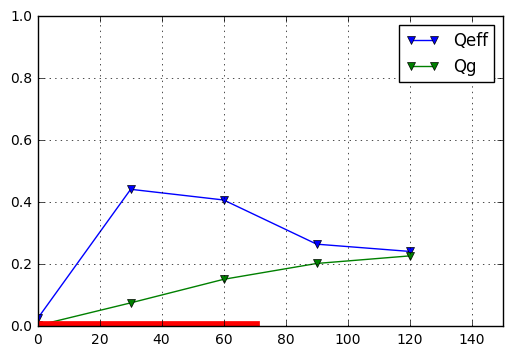

In [155]:
gas_data = zip(r_g_dens, gas_dens)[:5] #в нуле не берем
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=spl_maj,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mudK, h=hK), M_to_L_K, 'K')))

plt.plot(r_g_dens[:5], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:5], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

Еще чуть более массивная фотометрия:

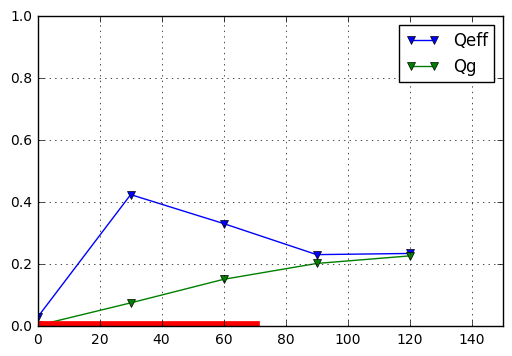

In [156]:
gas_data = zip(r_g_dens, gas_dens)[:5] #в нуле не берем
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=spl_maj,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mudH, h=hH), M_to_L_H, 'H')))

plt.plot(r_g_dens[:5], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:5], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

Стало даже хуже, потому что эта фотометрия убывает быстрее.

TODO: понять, почему от диплома отличается, почему просели точки

## Учет толщины

$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{s}})}{k\, h_{z}^{\mathrm{s}}}\right\} +\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{g}})}{k\, h_{z}^{\mathrm{g}}}\right\} >1$$

$$\begin{array}{rcl}
\sigma_{z}^{2}=\pi Gz_{0}^{\mathrm{s}}(\Sigma_{\mathrm{s}}+\Sigma_{\mathrm{g}})\,,\\
\\
c_{\mathrm{g}}^{2}=\pi Gz_{0}^{\mathrm{g}}(\Sigma_{\mathrm{g}}+\Sigma_{\mathrm{s}})\,.
\end{array}$$

Отсюда можно найти толщины

## Эксперименты

In [11]:
# %install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 2.7.12 64bit [MSC v.1500 64 bit (AMD64)]
IPython 5.1.0
OS Windows 7 6.1.7601 SP1
numpy 1.11.2
scipy 0.18.1
matplotlib 1.5.1
Tue Oct 25 17:30:47 2016 RTZ 2 (зима)